# Import Library

In [2]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data

## 💾 The data

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

***Acknowledgments**: Laksika Tharmalingam, Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset* (this is a fictitious dataset)

## Load and Read

In [6]:
df = pd.read_csv('sleep_health_data.csv')

In [7]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Unique Value

In [11]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

__Gender__

In [13]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

Make the Gender datatype become categorical

In [16]:
df.Gender = df.Gender.astype('category')

__Occupation__

In [18]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

Salesperson and Sales Representative is the same occupation, so we need to merge it

In [20]:
df['Occupation'] = df['Occupation'].replace(['Sales Representative'],['Salesperson'])

In [21]:
df['Occupation'].value_counts()

Occupation
Nurse                73
Doctor               71
Engineer             63
Lawyer               47
Teacher              40
Accountant           37
Salesperson          34
Software Engineer     4
Scientist             4
Manager               1
Name: count, dtype: int64

the total people for Software Engineer, Scientist, lower than others. We need to merged them

In [23]:
df['Occupation'] = df['Occupation'].replace(['Software Engineer','Scientist','Manager'],['Other','Other', 'Other'])

In [24]:
df['Occupation'].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    34
Other           9
Name: count, dtype: int64

__BMI Category__

In [26]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

Body Mass Index (BMI) is a person’s weight in kilograms divided by the square of height in meters. A high BMI can indicate high body fatness. BMI screens for weight categories that may lead to health problems, but it does not diagnose the body fatness or health of an individual. BMI category are Underweight, Healthy Weight, Overweight, and Obese. source: [CDC](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

We need to change Normal and Normal Weight to Healthy Weight

In [29]:
df['BMI Category'] = df['BMI Category'].replace(['Normal', 'Normal Weight'],['Healthy Weight', 'Healthy Weight'])

In [30]:
df['BMI Category'].unique()

array(['Overweight', 'Healthy Weight', 'Obese'], dtype=object)

Make the BMI Category to category datatype

In [32]:
bmi_type= CategoricalDtype(categories=['Underweight', 'Healthy Weight','Overweight','Obese'], ordered=True)
df['BMI Category']= df['BMI Category'].astype('category')

In [33]:
df['BMI Category'].value_counts()

BMI Category
Healthy Weight    216
Overweight        148
Obese              10
Name: count, dtype: int64

__Sleep Disorder__

In [35]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [36]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('none')

Make Sleep Disorder category datatype

In [38]:
disorder_type= CategoricalDtype(categories=['none', 'Sleep Apnea','Insomnia'])
df['Sleep Disorder']= df['Sleep Disorder'].astype('category')

In [39]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
none           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

## Missing data & Duplicates

drop person ID, person ID is more like index

In [42]:
df = df.drop('Person ID', axis=1)

### Find and drop duplicates

In [44]:
df[df.duplicated()].count()

Gender                     242
Age                        242
Occupation                 242
Sleep Duration             242
Quality of Sleep           242
Physical Activity Level    242
Stress Level               242
BMI Category               242
Blood Pressure             242
Heart Rate                 242
Daily Steps                242
Sleep Disorder             242
dtype: int64

There are 242 duplicates. drop the duplicates

In [46]:
df = df.drop_duplicates()

In [47]:
df[df.duplicated()].count()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Find Missing Data

In [49]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

There are 0 missing data

## Blood Pressure become category

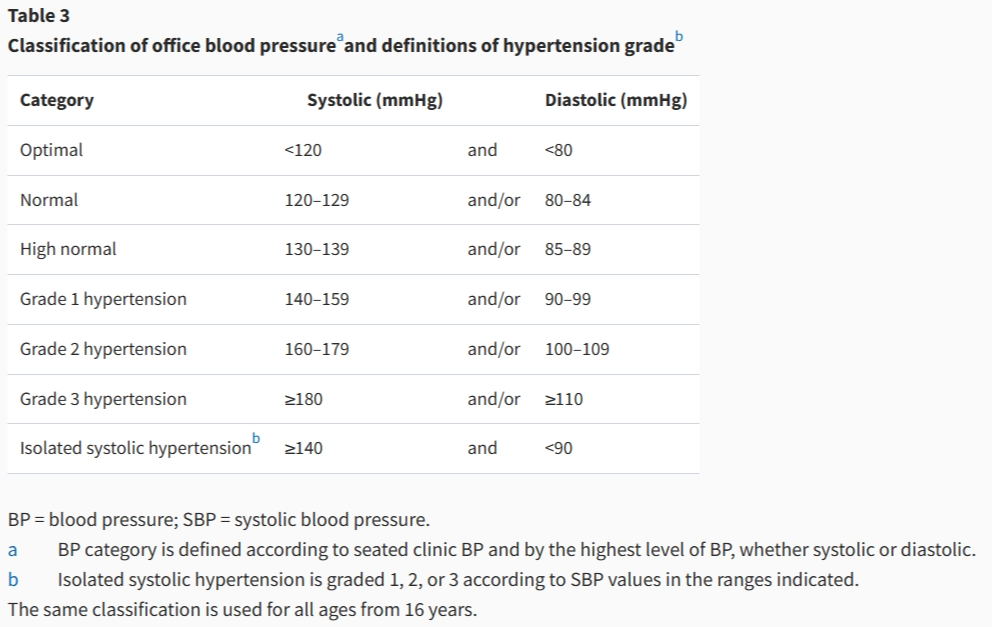

From [European Society of Cardiology (ESC) and European Society of Hypertension (ESH)](https://academic.oup.com/eurheartj/article/39/33/3021/5079119?login=false#186437779), the blood pressure can be identified as above. We can make a new column from blood pressure column by extrcating systolic and diastolic pressure

In [54]:
df[['systolic', 'diastolic']]=df['Blood Pressure'].str.split(pat='/', n=1, expand=True)

In [55]:
df['systolic']=df['systolic'].astype('int')
df['diastolic']=df['diastolic'].astype('int')

In [56]:
def blood_press_category (r):
    c='unknown'
    if(r['systolic']<120 and r['diastolic']<80):
        c='optimal'
    elif(120<=r['systolic']<=129 and 80<=r['diastolic']<=84):
        c='normal'
    elif(120<=r['systolic']<=129 or 80<=r['diastolic']<=84):
        c='normal'
    elif(130<=r['systolic']<=139 and 85<=r['diastolic']<=89):
        c='high normal'
    elif(130<=r['systolic']<=139 or 85<=r['diastolic']<=89):
        c='high normal'
    elif(140<=r['systolic']<=159 and 90<=r['diastolic']<=99):
        c='grade 1 hypertension'
    elif(140<=r['systolic']<=159 or 90<=r['diastolic']<=99):
        c='grade 1 hypertension'
    elif(160<=r['systolic']<=179 and 100<=r['diastolic']<=109):
        c='grade 2 hypertension'
    elif(160<=r['systolic']<=179 or 100<=r['diastolic']<=109):
        c='grade 2 hypertension'
    elif(180<=r['systolic'] and 110<=r['diastolic']):
        c='grade 3 hypertension'
    elif(180<=r['systolic'] or 110<=r['diastolic']):
        c='grade 3 hypertension'
    elif(140<=r['systolic'] and 90<=r['diastolic']):
        c='isolated systolic hypertension'

    return c

In [57]:
df['press_cat']=df.apply(lambda r: blood_press_category (r), axis=1)

In [58]:
press_type= CategoricalDtype(categories=['normal','high normal','grade 1 hypertension', 'grade 2 hypertension', 'grade 3 hypertension', 'isolated systolic hypertension'], ordered=True)
df['press_cat']= df['press_cat'].astype(press_type)

In [59]:
df = df.drop('Blood Pressure', axis=1)

In [60]:
df['press_cat'].value_counts()

press_cat
normal                            48
high normal                       44
grade 1 hypertension              25
grade 2 hypertension               0
grade 3 hypertension               0
isolated systolic hypertension     0
Name: count, dtype: int64

There are no grade 2 hypertension, grade 3 hypertension, and isolated systolic hypertension, so we can drop them

In [62]:
df['press_cat']=df.press_cat.cat.remove_unused_categories()

# 💪 Challenge

Leverage this sleep data to analyze the relationship between lifestyle, health, demographic factors, and sleep quality. Your goal is to identify factors that correlate with poor sleep health.

Some examples:

- Examine relationships between several factors like gender, occupation, physical activity, stress levels, and sleep quality/duration. Create visualizations to present your findings.
- Produce recommendations on ways people can improve sleep health based on the patterns in the data.
- Develop an accessible summary of study findings and recommendations for improving sleep health for non-technical audiences.

# EDA

In [65]:
sns.set_style('whitegrid')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   132 non-null    category
 1   Age                      132 non-null    int64   
 2   Occupation               132 non-null    object  
 3   Sleep Duration           132 non-null    float64 
 4   Quality of Sleep         132 non-null    int64   
 5   Physical Activity Level  132 non-null    int64   
 6   Stress Level             132 non-null    int64   
 7   BMI Category             132 non-null    category
 8   Heart Rate               132 non-null    int64   
 9   Daily Steps              132 non-null    int64   
 10  Sleep Disorder           132 non-null    category
 11  systolic                 132 non-null    int32   
 12  diastolic                132 non-null    int32   
 13  press_cat                117 non-null    category
dtypes: category(4),

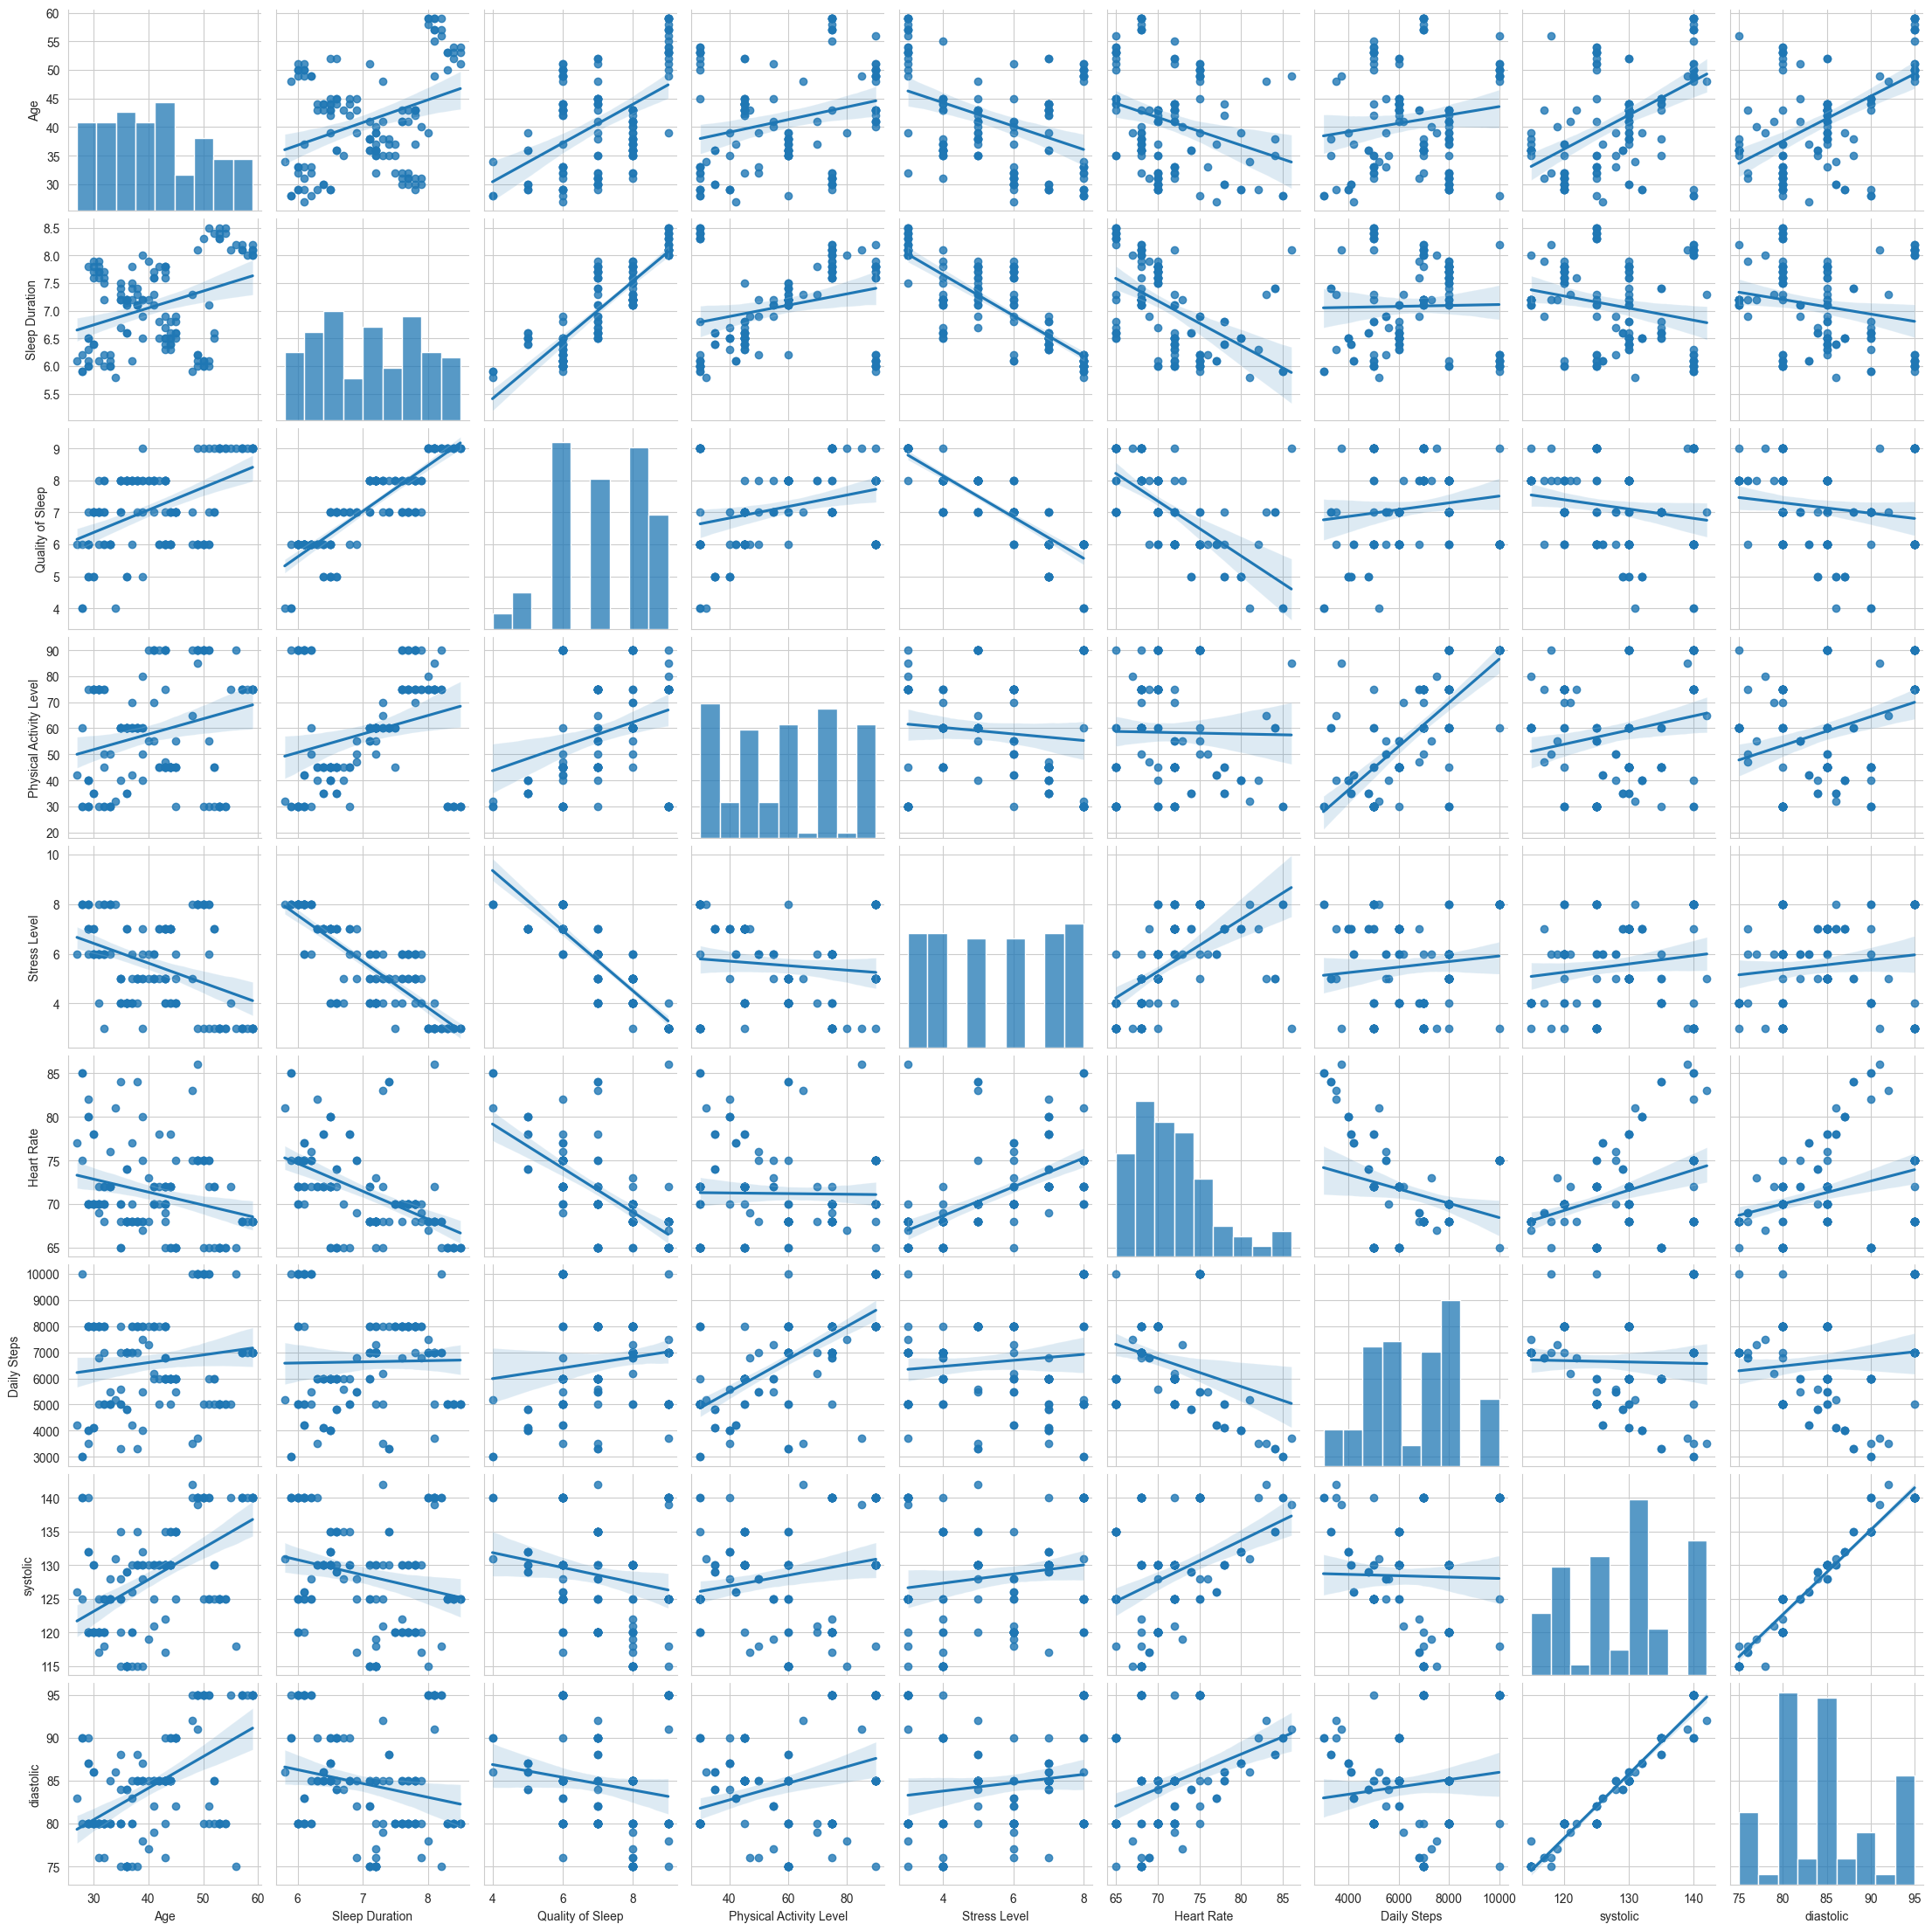

In [222]:
sns.pairplot(data=df, kind='reg')

## Gender

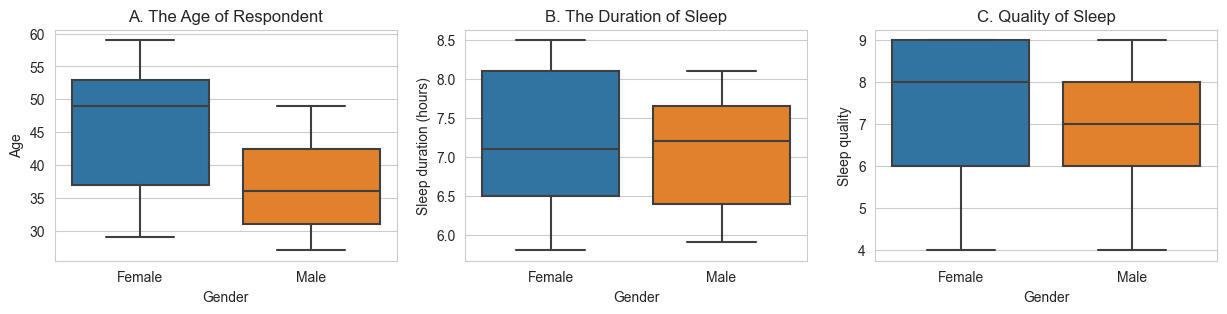

In [68]:
fig, axs = plt.subplots(1,3,figsize=(15,3))

sns.boxplot(data=df, x='Gender', y='Age', ax=axs[0]).set_title('A. The Age of Respondent')

sns.boxplot(data=df, x='Gender', y='Sleep Duration', ax=axs[1]).set_title('B. The Duration of Sleep')
axs[1].set(ylabel='Sleep duration (hours)')

sns.boxplot(data=df, x='Gender', y='Quality of Sleep', ax=axs[2]).set_title('C. Quality of Sleep')
axs[2].set(ylabel='Sleep quality')

plt.show()

__The Statement__

From above, we can take a statement
1. Female has the average age older than male, with average female is under 50 and male is under 40
2. The duration sleep of female is shorter than male
3. The sleep quality of female is higher than male. It's contradictory with general knowledge that the longer sleep=the higher sleep quality

## Occupation

__Number of participants based on occupation__

In [73]:
occ_count = df.groupby('Occupation', as_index=False).size()
occ_count.sort_values('size', ascending=False, inplace=True)

__Sleep duration based on occupation__

In [75]:
occ_sleep = df.groupby('Occupation', as_index=False).agg({'Sleep Duration':'mean'})
occ_sleep.sort_values('Sleep Duration', ascending=False, inplace=True)

__Sleep quality based on occupation__

In [77]:
occ_qua = df.groupby('Occupation', as_index=False).agg({'Quality of Sleep':'mean'})
occ_qua.sort_values('Quality of Sleep', ascending=False, inplace=True)

__The Plot__

[Text(0.5, 1.0, 'sleep quality based on occupation'),
 Text(0, 0.5, 'Sleep quality')]

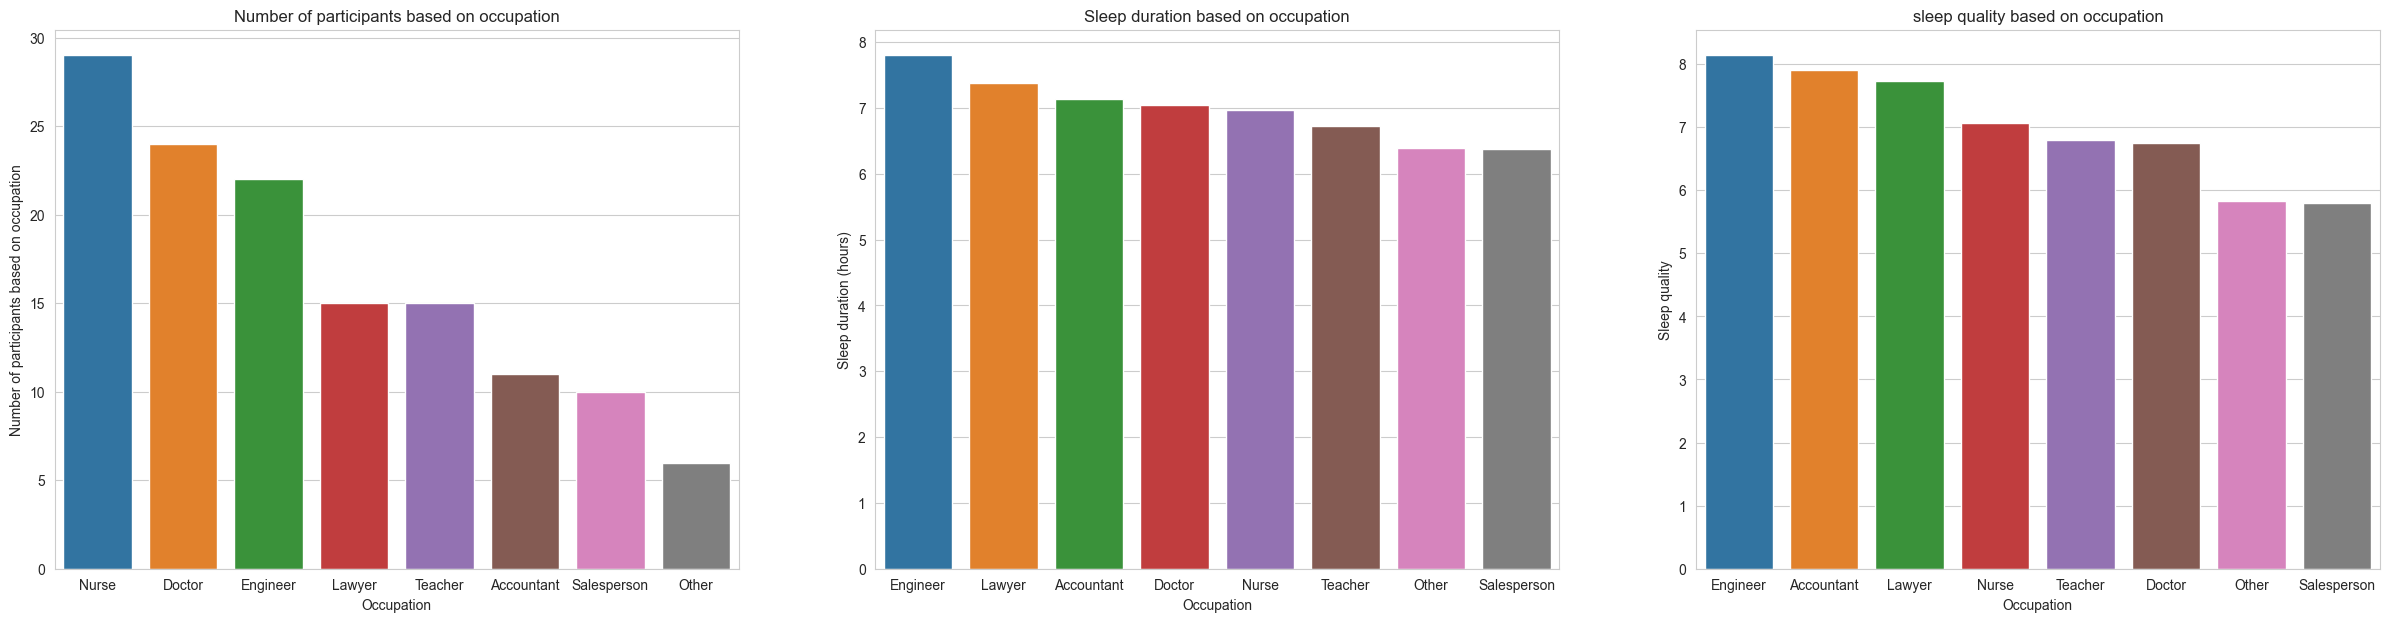

In [79]:
fig, axs = plt.subplots(1,3,figsize=(30,7))

sns.barplot(data=occ_count, x='Occupation', y='size', order=occ_count['Occupation'].values, ax=axs[0])
axs[0].set(title='Number of participants based on occupation',  ylabel='Number of participants based on occupation')

sns.barplot(data=occ_sleep, x='Occupation', y='Sleep Duration', order=occ_sleep['Occupation'].values, ax=axs[1])
axs[1].set(title='Sleep duration based on occupation',  ylabel='Sleep duration (hours)')

sns.barplot(data=occ_qua, x='Occupation', y='Quality of Sleep', order=occ_qua['Occupation'].values, ax=axs[2])
axs[2].set(title='sleep quality based on occupation',  ylabel='Sleep quality')

__Stress Level on occupation__

In [208]:
occ_sl = df.groupby('Occupation', as_index=False).agg({'Stress Level':'mean'})
occ_sl.sort_values('Stress Level', ascending=False, inplace=True)

[Text(0.5, 1.0, 'Stress Level based on occupation')]

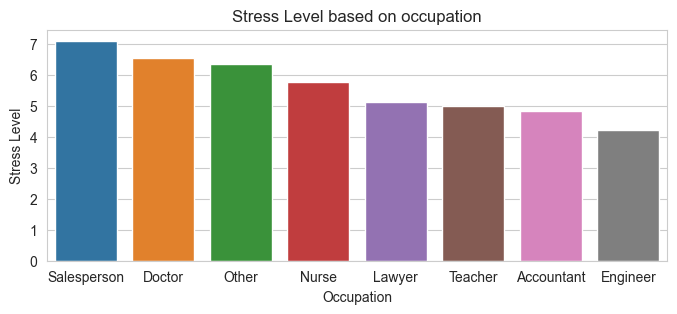

In [218]:
plt.figure(figsize=(8,3))
g = sns.barplot(data=occ_sl, x='Occupation', y='Stress Level', order=occ_sl['Occupation'].values)
g.set(title='Stress Level based on occupation')

There are similiraty in order of stress level and sleep quality based on occupation, we will discuss it the correlation stress level with sleep quality in Stress Level Section

## Physical Activity Level

__Sleep duration based on PAL__

In [82]:
pal_sleep = df.groupby('Physical Activity Level', as_index=False).agg({'Sleep Duration':'mean'})
pal_sleep.sort_values('Sleep Duration', ascending=False, inplace=True)

__Sleep quality based on PAL__

In [84]:
pal_qua = df.groupby('Physical Activity Level', as_index=False).agg({'Quality of Sleep':'mean'})
pal_qua.sort_values('Quality of Sleep', ascending=False, inplace=True)

__The Plot__

[Text(0.5, 1.0, 'sleep quality based on Physical Activity Level'),
 Text(0, 0.5, 'Sleep quality')]

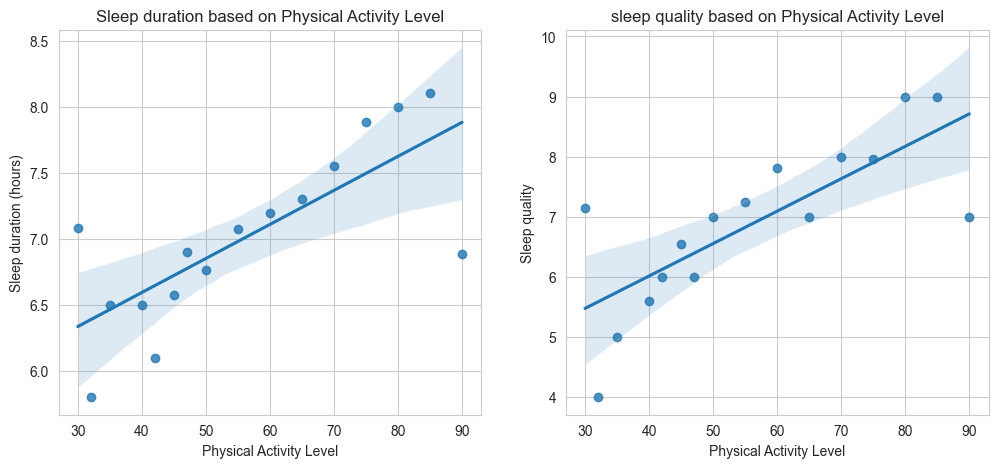

In [86]:
fig, axs = plt.subplots(1,2,figsize=(12,5))

sns.regplot(data=pal_sleep, x='Physical Activity Level', y='Sleep Duration', ax=axs[0])
axs[0].set(title='Sleep duration based on Physical Activity Level',  ylabel='Sleep duration (hours)')

sns.regplot(data=pal_qua, x='Physical Activity Level', y='Quality of Sleep', ax=axs[1])
axs[1].set(title='sleep quality based on Physical Activity Level',  ylabel='Sleep quality')

__The Statement__

The more person engange in physical activity, the longer duration of sleep. It's because it drains more energy as we working so people tend to sleep longer to recharge energy. Exercise it also helps body to become more healthy so the quality of sleep become better

## Stress Level

__Sleep duration based on Stress Level__

In [91]:
sl_sleep = df.groupby('Stress Level', as_index=False).agg({'Sleep Duration':'mean'})
sl_sleep.sort_values('Sleep Duration', ascending=False, inplace=True)

__Sleep quality based on Stress Level__

In [93]:
sl_qua = df.groupby('Stress Level', as_index=False).agg({'Quality of Sleep':'mean'})
sl_qua.sort_values('Quality of Sleep', ascending=False, inplace=True)

__The Plot__

[Text(0.5, 1.0, 'sleep quality based on Stress Level'),
 Text(0, 0.5, 'Sleep quality')]

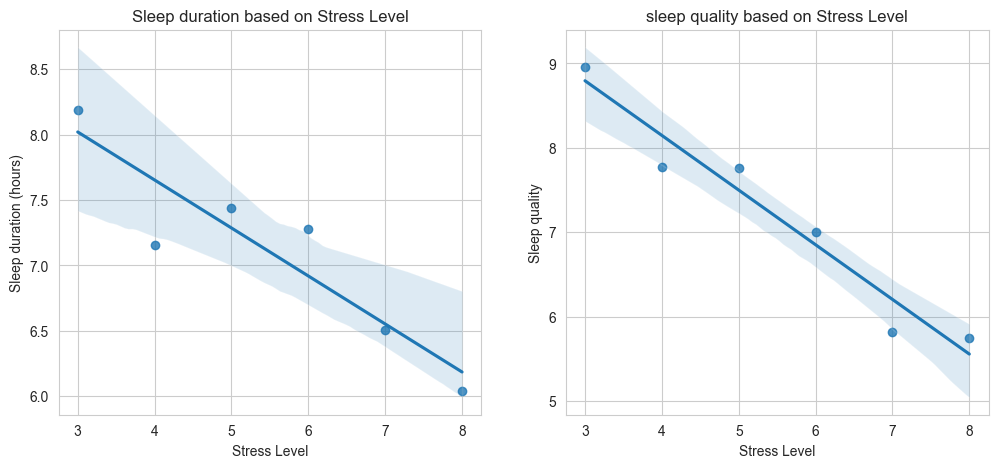

In [95]:
fig, axs = plt.subplots(1,2,figsize=(12,5))

sns.regplot(data=sl_sleep, x='Stress Level', y='Sleep Duration', ax=axs[0])
axs[0].set(title='Sleep duration based on Stress Level',  ylabel='Sleep duration (hours)')

sns.regplot(data=sl_qua, x='Stress Level', y='Quality of Sleep', ax=axs[1])
axs[1].set(title='sleep quality based on Stress Level',  ylabel='Sleep quality')

__The Statement__

The more stress you are, the less sleep duration and quality of sleep

## BMI Category

__Sleep duration based on BMI__

In [100]:
bmi_sleep = df.groupby('BMI Category', as_index=False).agg({'Sleep Duration':'mean'})
bmi_sleep.sort_values('Sleep Duration', ascending=False, inplace=True)

__Sleep quality based on BMI__

In [102]:
bmi_qua = df.groupby('BMI Category', as_index=False).agg({'Quality of Sleep':'mean'})
bmi_qua.sort_values('Quality of Sleep', ascending=False, inplace=True)

__The Plot__

[Text(0.5, 1.0, 'sleep quality based on occupation'),
 Text(0, 0.5, 'Sleep quality')]

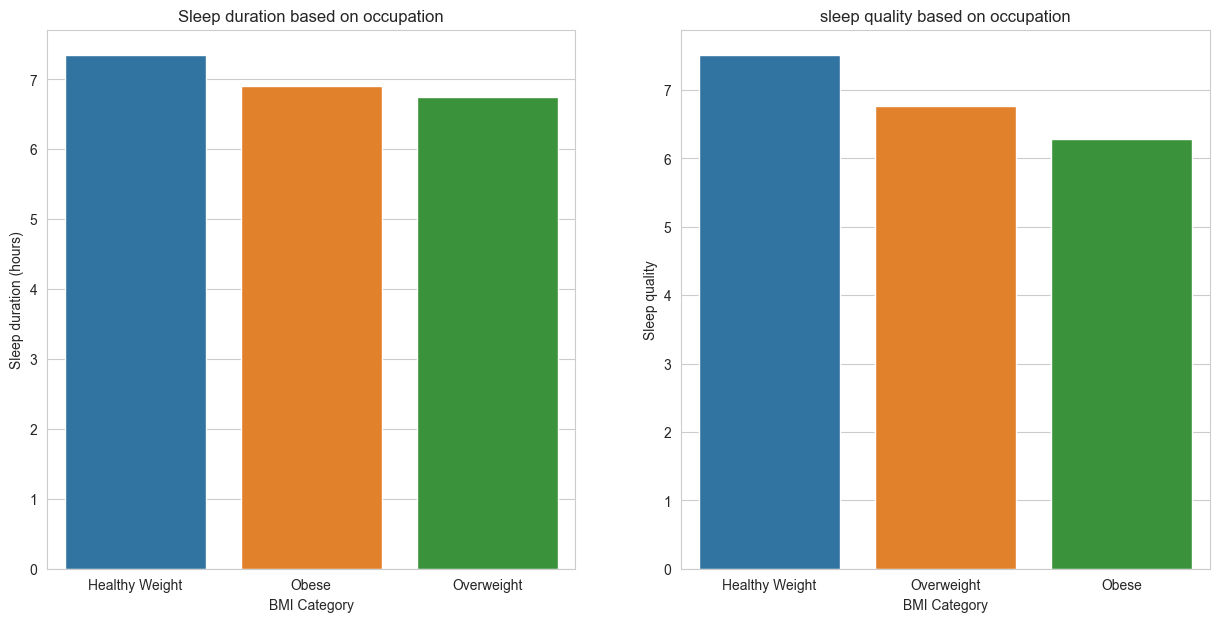

In [104]:
fig, axs = plt.subplots(1,2,figsize=(15,7))

sns.barplot(data=bmi_sleep, x='BMI Category', y='Sleep Duration', order=bmi_sleep['BMI Category'].values, ax=axs[0])
axs[0].set(title='Sleep duration based on occupation',  ylabel='Sleep duration (hours)')

sns.barplot(data=bmi_qua, x='BMI Category', y='Quality of Sleep', order=bmi_qua['BMI Category'].values, ax=axs[1])
axs[1].set(title='sleep quality based on occupation',  ylabel='Sleep quality')

__The Statement__

Healthy Weight give better sleep quality

## Sleep Disorder

__Sleep duration based on Sleep Disorder__

In [109]:
sd_sleep = df.groupby('Sleep Disorder', as_index=False).agg({'Sleep Duration':'mean'})
sd_sleep.sort_values('Sleep Duration', ascending=False, inplace=True)

__Sleep quality based on BMI__

In [111]:
sd_qua = df.groupby('Sleep Disorder', as_index=False).agg({'Quality of Sleep':'mean'})
sd_qua.sort_values('Quality of Sleep', ascending=False, inplace=True)

__The Plot__

[Text(0.5, 1.0, 'sleep quality based on sleep disorder'),
 Text(0, 0.5, 'Sleep quality')]

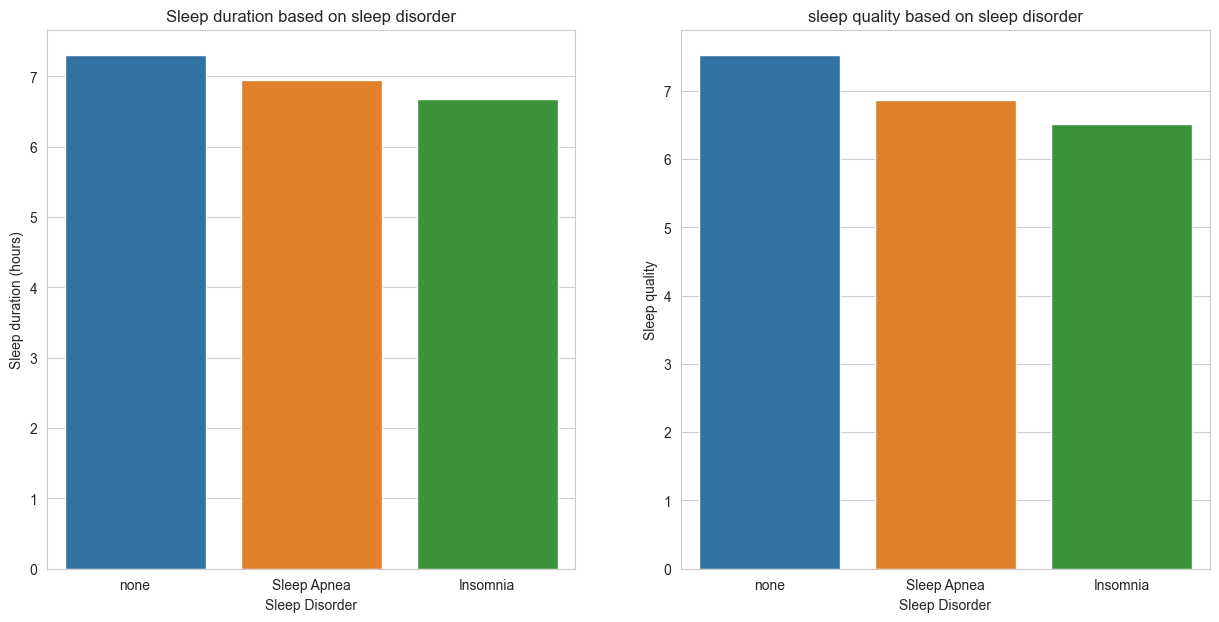

In [113]:
fig, axs = plt.subplots(1,2,figsize=(15,7))

sns.barplot(data=sd_sleep, x='Sleep Disorder', y='Sleep Duration', order=sd_sleep['Sleep Disorder'].values, ax=axs[0])
axs[0].set(title='Sleep duration based on sleep disorder',  ylabel='Sleep duration (hours)')

sns.barplot(data=sd_qua, x='Sleep Disorder', y='Quality of Sleep', order=sd_qua['Sleep Disorder'].values, ax=axs[1])
axs[1].set(title='sleep quality based on sleep disorder',  ylabel='Sleep quality')

__The Statement__

Healthy Weight give better sleep quality

## Correlation between Daily Steps and Physical Activity Level

Daily Steps can be said part of physical activities beside active workout.

In [118]:
df[['Daily Steps', 'Physical Activity Level']].corr(numeric_only=True)

,Daily Steps,Physical Activity Level
Daily Steps,1.000000,0.721477
Physical Activity Level,0.721477,1.000000


The correlation is 0.72. so with increase daily steps, physical activity level also increase

we can drop Daily Steps column

## Correlation: Stress Level, BMI, Sleep Disorder

### BMI & Sleep Disorder

In [306]:
sd_bmi = pd.DataFrame(df[['Sleep Disorder', 'BMI Category']].value_counts())
sd_bmi.reset_index(inplace=True)
sd_bmi

,Sleep Disorder,BMI Category,count
0,none,Healthy Weight,58
1,Sleep Apnea,Overweight,19
2,Insomnia,Overweight,18
3,none,Overweight,15
4,Insomnia,Healthy Weight,8
5,Sleep Apnea,Healthy Weight,7
6,Sleep Apnea,Obese,4
7,Insomnia,Obese,3


[Text(0.5, 1.0, 'frequencies of Sleep Disorder per BMI class'),
 Text(0, 0.5, 'frequency')]

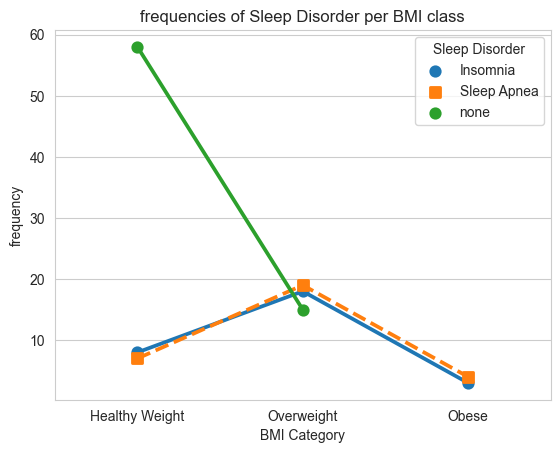

In [314]:
order = ['Healthy Weight','Overweight','Obese']
g = sns.pointplot(data=sd_bmi, x='BMI Category', y='count', hue='Sleep Disorder', markers=['o','s','o'], linestyles=['-','--','-'], order=order)
g.set(title='frequencies of Sleep Disorder per BMI class', ylabel= 'frequency')

Based on the plot, Healthy Weight have more people who didn't have sleep disorder than Overweight and Obese. All Obese people have sleep disorder

### Stress Level & Sleep Disorder

In [321]:
sd_sl = pd.DataFrame(df[['Sleep Disorder', 'Stress Level']].value_counts())
sd_sl.reset_index(inplace=True)
sd_sl

,Sleep Disorder,Stress Level,count
0,none,6,19
1,Insomnia,7,14
2,none,3,14
3,none,4,14
4,none,5,13
5,Sleep Apnea,8,11
6,none,8,10
7,Sleep Apnea,3,7
8,Insomnia,4,6
9,Sleep Apnea,7,5


[Text(0.5, 1.0, 'frequencies of Sleep Disorder per Stress Level'),
 Text(0, 0.5, 'frequency')]

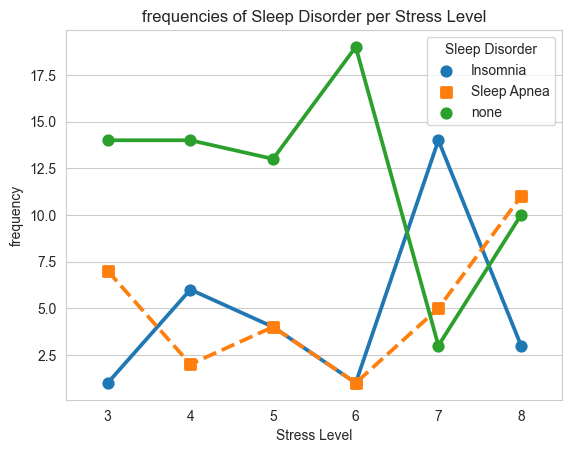

In [325]:
g = sns.pointplot(data=sd_sl, x='Stress Level', y='count', hue='Sleep Disorder', markers=['o','s','o'], linestyles=['-','--','-'])
g.set(title='frequencies of Sleep Disorder per Stress Level', ylabel= 'frequency')

Based on the plot, the higher stress level, more people tend to have sleep disorder for sleep apnea

## Heart and Sleep

### Correlation: Heart Rate, Sleep Duration, Sleep Quality

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   132 non-null    category
 1   Age                      132 non-null    int64   
 2   Occupation               132 non-null    object  
 3   Sleep Duration           132 non-null    float64 
 4   Quality of Sleep         132 non-null    int64   
 5   Physical Activity Level  132 non-null    int64   
 6   Stress Level             132 non-null    int64   
 7   BMI Category             132 non-null    category
 8   Heart Rate               132 non-null    int64   
 9   Daily Steps              132 non-null    int64   
 10  Sleep Disorder           132 non-null    category
 11  systolic                 132 non-null    int32   
 12  diastolic                132 non-null    int32   
 13  press_cat                117 non-null    category
dtypes: category(4),

In [124]:
corr_heart = df[['Heart Rate', 'Sleep Duration', 'Quality of Sleep']].corr(numeric_only=True)
corr_heart

,Heart Rate,Sleep Duration,Quality of Sleep
Heart Rate,1.000000,-0.508791,-0.660056
Sleep Duration,-0.508791,1.000000,0.869302
Quality of Sleep,-0.660056,0.869302,1.000000


__Correlation__
1. When Heart Rate faster, the sleep duration shorter (-0.5)
2. When Heart Rate faster, the sleep quality lower (-0.66)
3. Longer sleep is better quality of sleep (0.87)

__Sleep duration based on Heart Rate__

In [127]:
hr_sleep = df.groupby('Heart Rate', as_index=False).agg({'Sleep Duration':'mean'})
hr_sleep.sort_values('Sleep Duration', ascending=False, inplace=True)

__Sleep quality based on Heart Rate__

In [129]:
hr_qua = df.groupby('Heart Rate', as_index=False).agg({'Quality of Sleep':'mean'})
hr_qua.sort_values('Quality of Sleep', ascending=False, inplace=True)

__The Plot__

[Text(0.5, 1.0, 'sleep quality based on heart rate'),
 Text(0, 0.5, 'Sleep quality')]

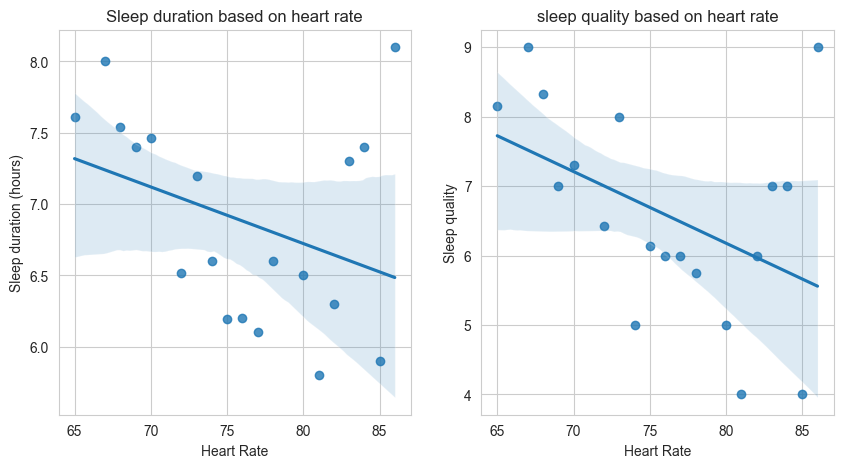

In [131]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.regplot(data=hr_sleep, x='Heart Rate', y='Sleep Duration', ax=axs[0])
axs[0].set(title='Sleep duration based on heart rate',  ylabel='Sleep duration (hours)')

sns.regplot(data=hr_qua, x='Heart Rate', y='Quality of Sleep', ax=axs[1])
axs[1].set(title='sleep quality based on heart rate',  ylabel='Sleep quality')

__The Statement__

The faster heart rate, the less sleep duration and sleep quality

## Correlation: BMI and Blood Pressure

[Text(0.5, 1.0, 'frequencies of blood pressure category per BMI class'),
 Text(0, 0.5, 'number of participants')]

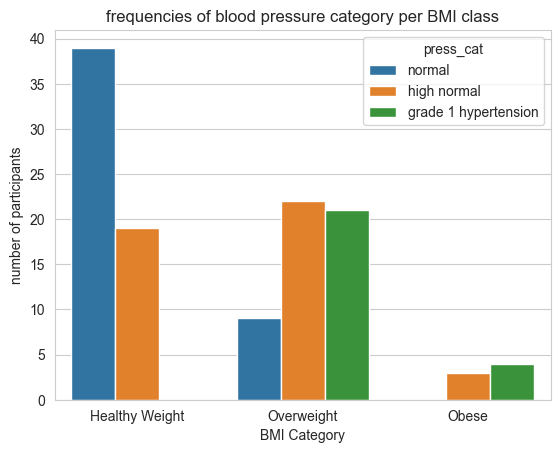

In [135]:
order = ['Healthy Weight','Overweight','Obese']
g = sns.countplot(data=df, x='BMI Category', hue='press_cat', order=order)
g.set(title='frequencies of blood pressure category per BMI class', ylabel= 'number of participants')

Overweight and Obese people are at risk of hypertension

## Correlation: Physical Activity Level and Blood Pressure

In [268]:
pal_bp = df.groupby('press_cat', as_index=False).agg({'Physical Activity Level':'mean'})
pal_bp.sort_values('Physical Activity Level', ascending=False, inplace=True)

[Text(0.5, 1.0, 'Physical Activity Level of blood pressure category')]

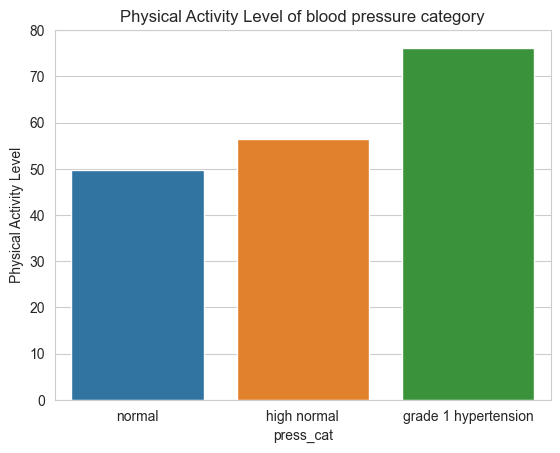

In [270]:
h = sns.barplot(data=pal_bp, x='press_cat', y='Physical Activity Level')
h.set(title='Physical Activity Level of blood pressure category')

The grade 1 hypertension people has longer physical activity than normal people, based on correlation between bmi and blood pressure, all grade 1 hypertension is obese. Logicaly, people with higher phycial activity level tend to healthier and close to normal BMI. So, physical activity level doesn't determined the blood pressure. There are more than physical activity to determined what factor taht influence blood pressure